# Example: experiments

This is a quick example on how to run experiments on synthetic hypergraph.

In [1]:
import os
os.chdir('../')

from utils import HypergraphModels as HM
from utils import HypergraphStructure as HS
from utils import HypergraphRW as HRW

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Example: experiments on hypergraph with homogeneous cardinality distriburtion (Poisson)

To generate the hypergraph we need the method ```HM.Generate_Poisson_Hypergraph``` which takes as argument beta (Poisson parameter), N (number of nodes), and m (number of hyperedges). 
We can then use the main function ```HRW.rw_on_generated_hypergraphs``` to compute the average mean hitting time for many experiments. This function takes as argument:
* **generation_function**: the function used to generate the hypergraphs (in this case HM.Generate_Poisson_Hypergraph).
* **Kwargs**: the argument of generation_function.
* **Nexp**: number of experiments to perform.
* **rw_type**: Type of random walk. Options: 'urw' (unbiased random walk) or 'merw' (maximal entropy random walk).
* **rw_step**: Type of random walk step. Options: 'p' or 'projected' for the projected step, 'ho' or 'higher-order' for the higher-order step.
* **save_to**: File path to save the hitting times data. If None, data is not saved.

In [3]:
function_arguments = {}
function_arguments['beta'] = 10
function_arguments['N'] = 1000
function_arguments['m'] = 1000

# in this example we are saving the results in a file test1.txt
HRW.rw_on_generated_hypergraphs(HM.Generate_Poisson_Hypergraph,function_arguments, Nexp=10, rw_type='merw', rw_step='ho', save_to='test1.txt')

array([1712.70361882,   76.88868123])

In [4]:
# if we want to continue and make more experiments, we can just start from where we left
# let's compute 5 more experiments
HRW.rw_on_generated_hypergraphs(HM.Generate_Poisson_Hypergraph,function_arguments, Nexp=15, rw_type='merw', rw_step='ho', save_to='test1.txt')

file exists... starting from experiment 10


array([1703.07685266,   79.79866532])

We are interested in how the hitting times are changing as the parameter beta is changing.

In [5]:
betas = [5,10,15,20,25]
function_arguments = {}
function_arguments['N'] = 1000
function_arguments['m'] = 1000
Nexp = 10
for beta in betas:
    function_arguments['beta'] = beta
    HRW.rw_on_generated_hypergraphs(HM.Generate_Poisson_Hypergraph,function_arguments, Nexp, rw_type='merw', rw_step='ho', save_to=f'test{beta}.txt')

In [6]:
# let's read and plot the data
betas = [5,10,15,20,25]
Nexp = 10
Ts = []
xs = []
for beta in betas:
    Ts.append(np.loadtxt(f'test{beta}.txt'))
    xs.append([beta]*Nexp)
Ts = np.array(Ts)
xs = np.array(xs)

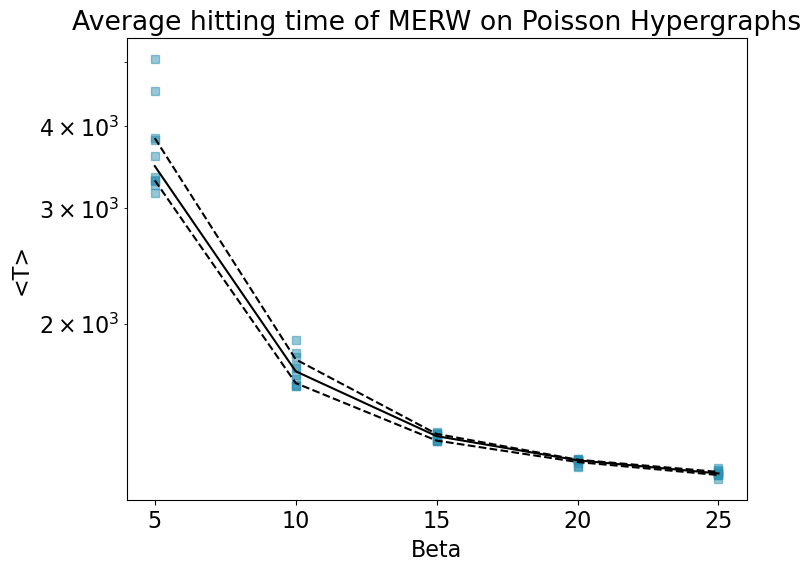

In [7]:
### plots
plt.rcParams.update({'font.size': 16})
hfont = {'fontname':'Myriad Pro'}
# plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'

fig,ax1 = plt.subplots(figsize = (8,6))

colors = (44/255,144/255,177/255)
styles = 's'

ax1.semilogy(np.concatenate(xs), np.concatenate(Ts),'s', color = (44/255,144/255,177/255), alpha = 0.5)
ax1.plot(np.unique(xs), -np.sort(-np.median(Ts,axis=1)), color = 'black')
ax1.plot(np.unique(xs), -np.sort(-np.quantile(Ts,q = 0.25,axis=1)), color = 'black', ls = '--') #first quartile
ax1.plot(np.unique(xs), -np.sort(-np.quantile(Ts,q = 0.75,axis=1)), color = 'black', ls = '--') #third quartile

ax1.set_xticks(betas)
ax1.set_xlabel('Beta')
ax1.set_ylabel(r'<T>')
ax1.set_title('Average hitting time of MERW on Poisson Hypergraphs')

plt.show()